<a href="https://colab.research.google.com/github/xwang222/My-Projects/blob/main/StockPrice_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install bayesian-optimization

In [ ]:
import keras

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier

from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
import pickle
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from sklearn.metrics import make_scorer, accuracy_score

In [ ]:
score_acc = make_scorer(accuracy_score)
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
import keras_tuner as kt

In [ ]:
!pip install PyWavelets

In [ ]:
import pywt

In [ ]:
google_stock_data = pd.read_csv('/content/drive/MyDrive/ChinaQuant/GOOG.csv')
google_stock_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
google_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [ ]:
google_stock_data = google_stock_data[['date','open','volume']] # Extracting required columns
google_stock_data['date'] = pd.to_datetime(google_stock_data['date'].apply(lambda x: x.split()[0])) # Selecting only date
google_stock_data.set_index('date',drop=True,inplace=True) # Setting date column as index
google_stock_data.head()

,open,volume
date,,
2016-06-14,716.48,1306065
2016-06-15,719.00,1214517
2016-06-16,714.91,1982471
2016-06-17,708.65,3402357
2016-06-20,698.77,2082538


In [ ]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(google_stock_data['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(google_stock_data['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

# Denoising using wavelet

In [ ]:
def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

In [ ]:
def wavelet_denoising(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

In [ ]:
goog_reserve=google_stock_data['open']
google_stock_data['open'] = wavelet_denoising(google_stock_data['open'])

In [ ]:
#coeff = pywt.wavedec(google_stock_data['open'], 'db4', mode="per")

In [ ]:
#@title
#!apt install octave

In [ ]:
#@title
#%%writefile test.m

#XDEN = wdenoise(google_stock_data['open'])


In [ ]:
#@title
#!octave test.m/content/test.m

In [ ]:
#@title
#XDEN = wdenoise(google_stock_data['open'])

# Data Pre-Processing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
google_stock_data['open'] = MMS.fit_transform(google_stock_data['open'].values.reshape(-1, 1))
google_stock_data['volume'] = MMS.fit_transform(google_stock_data['volume'].values.reshape(-1, 1))

In [ ]:
google_stock_data.shape

(1258, 2)

In [ ]:
training_size = round(len(google_stock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1006

In [ ]:
train_data = google_stock_data[:training_size]
test_data  = google_stock_data[training_size:]

train_data.shape, test_data.shape

((1006, 2), (252, 2))

In [ ]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))


In [ ]:
len(train_data)

1006

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [ ]:
train_label

array([[0.05603715, 0.12375633],
       [0.05489863, 0.09899366],
       [0.05440444, 0.13991291],
       ...,
       [0.41165177, 0.18130483],
       [0.41260099, 0.20108275],
       [0.41348248, 0.28063176]])

In [ ]:
test=[]
for i in range(len(train_label)):
  test.append(train_label[i][0])

train_label=np.array(test)

In [ ]:
test=[]
for i in range(len(test_label)):
  test.append(test_label[i][0])

test_label=np.array(test)

In [ ]:
test_label

array([0.49134971, 0.49818899, 0.50564729, 0.51191431, 0.5166034 ,
       0.52111859, 0.52490891, 0.53390137, 0.54876818, 0.5352718 ,
       0.49191006, 0.47610837, 0.48334009, 0.48037044, 0.47724905,
       0.47118309, 0.45807832, 0.44518602, 0.43059573, 0.42096149,
       0.41772598, 0.41585393, 0.41743001, 0.41989508, 0.42282749,
       0.42936277, 0.43896065, 0.44280254, 0.44053346, 0.43602065,
       0.42695918, 0.42700208, 0.43730943, 0.44934846, 0.46662941,
       0.47713536, 0.47928932, 0.48172888, 0.48123158, 0.4841116 ,
       0.49153333, 0.49778956, 0.5045813 , 0.50497259, 0.497671  ,
       0.48727407, 0.47164899, 0.48278115, 0.52397766, 0.54500711,
       0.55146659, 0.56571582, 0.57929893, 0.58171177, 0.57358508,
       0.57371027, 0.58104346, 0.58446577, 0.58754179, 0.59010613,
       0.59100528, 0.59262449, 0.59466892, 0.59520116, 0.5944702 ,
       0.5931648 , 0.59094038, 0.59254447, 0.598474  , 0.60626039,
       0.61724991, 0.62116855, 0.61705645, 0.6109969 , 0.60024

In [ ]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((956, 50, 2), (956,), (202, 50, 2), (202,))

# Creating LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,851
Trainable params: 30,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

In [ ]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

array([[0.47741398],
       [0.48438865],
       [0.48772874],
       [0.48411995],
       [0.4921375 ]], dtype=float32)

In [ ]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[3144529.8],
       [3185403.2],
       [3204977. ],
       [3183828.8],
       [3230813.8]], dtype=float32)

# Visualizing predicted and actual data

In [ ]:
# Merging actual and predicted data for better visualization

gs_slic_data = pd.concat([google_stock_data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted'],index=google_stock_data.iloc[-202:].index)], axis=1)

In [ ]:
gs_slic_data[['open','volume']] = MMS.inverse_transform(gs_slic_data[['open','volume']]) # Inverse scaling

In [ ]:
gs_slic_data.head()

,open,volume,open_predicted
date,,,
2020-08-24,3.226197e+06,1410229.0,3144529.75
2020-08-25,3.266277e+06,2132084.0,3185403.25
2020-08-26,3.309985e+06,3581072.0,3204977.00
2020-08-27,3.346711e+06,1861602.0,3183828.75
2020-08-28,3.374190e+06,1499782.0,3230813.75


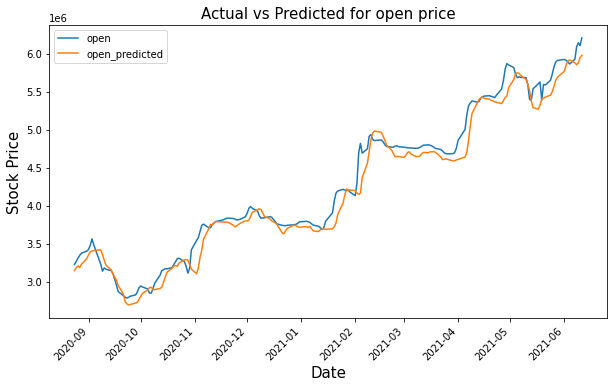

In [ ]:
gs_slic_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

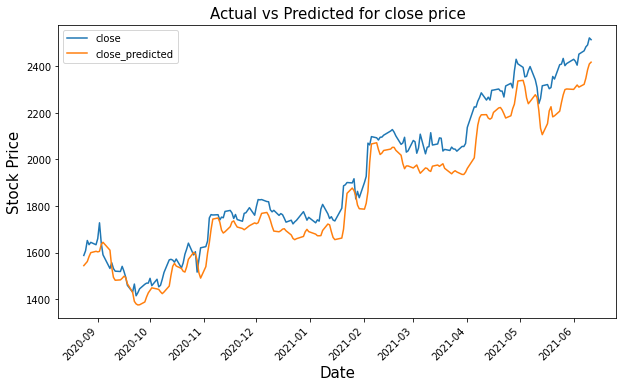

In [ ]:
#gs_slic_data[['close','close_predicted']].plot(figsize=(10,6))
#plt.xticks(rotation=45)
#plt.xlabel('Date',size=15)
#plt.ylabel('Stock Price',size=15)
#plt.title('Actual vs Predicted for close price',size=15)
#plt.show()